In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
RS = 100 # Fixed random seed for reproducibility

# csv 파일을 dataframe으로 읽어들임
df = pd.read_csv("IWPC_cleaned.csv")
# Dataframe 요약
df.describe(include="all")

,Gender,Age,Race,Height,Weight,Diabetes,CHF,ValveReplacement,Aspirin,Tylenol,Simvastatin,Amiodarone,Vitamin,Smoking,CYP2C9,VKORC1,Warfarin
count,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000
mean,0.603886,63.134230,0.729148,167.411021,76.083385,0.113901,0.154260,0.221525,0.155157,0.101046,0.118984,0.043049,0.405680,0.098655,0.386846,0.926158,30.396236
std,0.489162,15.089592,0.605153,10.831562,21.553977,0.317739,0.361252,0.415335,0.362108,0.301435,0.323818,0.202999,0.491097,0.298242,0.813210,0.803097,16.347013
min,0.000000,10.000000,0.000000,124.968000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000
25%,0.000000,53.000000,0.000000,160.000000,60.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,1.000000,65.000000,1.000000,167.640000,72.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000
75%,1.000000,74.000000,1.000000,175.260000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,38.000000
max,1.000000,99.000000,2.000000,202.000000,237.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,157.500000


In [2]:
# 처음 5개 행을 출력
df.head()

,Gender,Age,Race,Height,Weight,Diabetes,CHF,ValveReplacement,Aspirin,Tylenol,Simvastatin,Amiodarone,Vitamin,Smoking,CYP2C9,VKORC1,Warfarin
0,1,83,1,172.9994,69.0,0,0,0,1,1,0,0,0,0,0,2,157.5
1,0,56,2,161.2900,92.5,0,0,0,0,0,0,0,0,1,0,2,126.0
2,1,48,1,183.0070,113.0,1,1,0,0,0,0,0,0,0,0,2,122.5
3,0,70,1,149.9870,52.0,0,1,0,1,0,0,0,0,0,0,2,122.5
4,0,52,2,172.7200,135.0,1,0,0,0,0,1,0,0,0,0,1,121.9


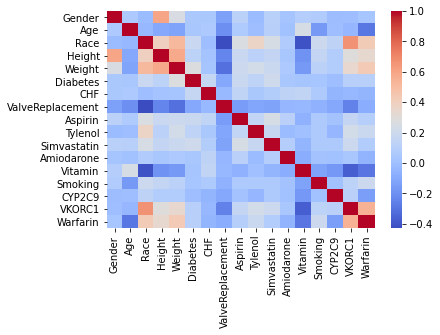

In [3]:
# 상관관계 패턴 확인
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

In [4]:
# test, train split. Warfarin 용량은 맨 마지막 열에 있다.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=RS) # 25% 데이터를 성능측정에 사용
X_train, y_train = train.iloc[:,0:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,0:-1], test.iloc[:,-1]

In [5]:
%%time
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
# 모델의 parameters 출력
print("Parameters:" , model1.intercept_, model1.coef_)

Parameters: -6.991670263943757 [-3.10935281 -0.18631035 -0.74368162  0.17258072  0.21276432  0.21635438
 -0.68861245  3.02526686 -0.08248388 -0.1556224  -0.55054597 -6.90406185
 -1.87993862  3.69973547 -4.54362514  9.20926432]
Wall time: 50.4 ms


In [6]:
%%time
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'solver': ['lbfgs'],
               'max_iter': [100, 300, 1000, 3000],
              'alpha': 10.0 ** -np.arange(1, 10),
              'hidden_layer_sizes':[(10,), (8,), (6,), (8,6), (8,4), (6,4), (6,2), (4,2)]}
model2 = RandomizedSearchCV(MLPRegressor(random_state=RS), random_grid, random_state=RS, n_iter=100, n_jobs=-1)
model2.fit(X_train, y_train)
# 모델의 hyperparameter, parameter 출력
print("Hyperparameters:", model2.best_params_)
pred2 = model2.predict(X_test)
print("Parameters:", model2.best_estimator_.coefs_)

Hyperparameters: {'solver': 'lbfgs', 'max_iter': 3000, 'hidden_layer_sizes': (6,), 'alpha': 0.001}
Parameters: [array([[ 0.58173401, -0.23148047, -0.07883705, -0.01500432, -0.80703216,
        -0.39524935],
       [-0.06019569,  0.34033452, -0.37943914, -3.40718363, -0.15590285,
        -0.30372171],
       [ 0.38563019, -0.40902788, -0.2927599 ,  1.51029419,  0.17787531,
        -0.3426388 ],
       [ 0.48208123, -0.23596702, -0.07133106,  0.19063925,  0.90592461,
        -0.17117167],
       [ 0.75584344, -0.13281964, -0.51628001,  2.84110227,  1.3218152 ,
        -0.50628839],
       [-0.2393338 ,  0.10841789, -0.4124006 , -0.20257396, -0.27634713,
         0.40776249],
       [ 0.45965093, -0.45961536,  0.40790284, -0.2054084 ,  0.28354306,
         0.13596966],
       [-0.80748664, -0.50087383, -0.30286061,  0.11204522,  0.58379938,
        -0.26038454],
       [-0.0760164 ,  0.36805646,  0.49611705,  0.32963539, -0.14393327,
         0.1032525 ],
       [-0.18431493, -0.16691216,

Hyperparameters {'n_estimators': 400, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 6, 'bootstrap': True}


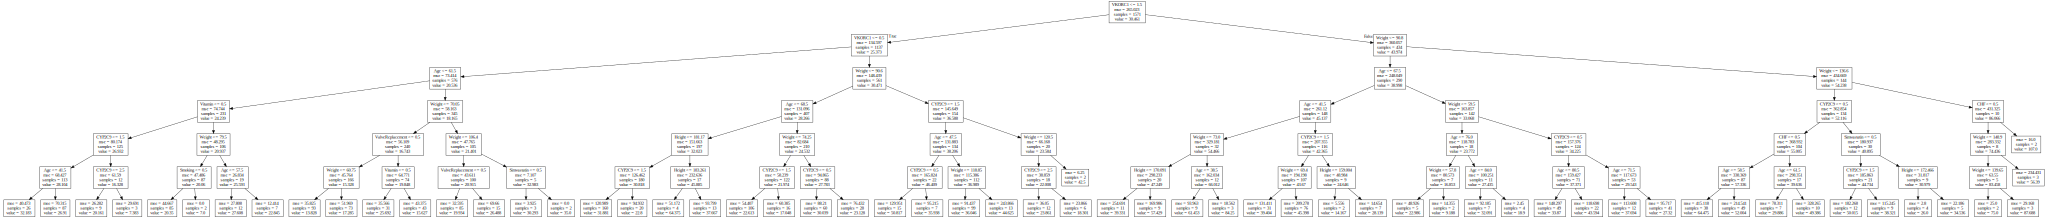

Wall time: 32.6 s


In [7]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': [200, 400, 800],
               'max_depth': [3, 6, 9, 12],
               'min_samples_split': [2, 3, 4, 5],
               'min_samples_leaf': [1, 2, 3, 4],
               'bootstrap': [True, False]}
model3 = RandomizedSearchCV(RandomForestRegressor(random_state=RS), random_grid, random_state=RS, n_iter=50, n_jobs=-1)
model3.fit(X_train, y_train)
# 모델의 hyperparameter 출력
print("Hyperparameters", model3.best_params_)
pred3 = model3.predict(X_test)
# 첫번째 tree 출력
from sklearn.tree import export_graphviz
import graphviz
tree = model3.best_estimator_.estimators_[0]
display(graphviz.Source(export_graphviz(tree, feature_names=df.columns[:-1])))

Linear Regression Model: Accuracy = 45.3%, RMSE = 12.41, R2 = 0.442
Neural Network Model:    Accuracy = 45.2%, RMSE = 12.42, R2 = 0.442
Random Forest Model:     Accuracy = 48.5%, RMSE = 12.61, R2 = 0.424


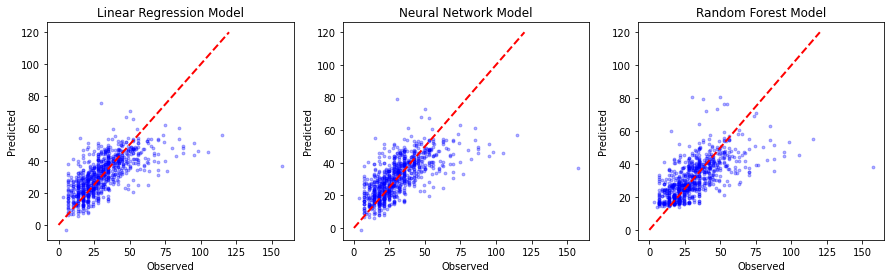

In [19]:
models = [('Linear Regression', model1), ('Neural Network', model2), ('Random Forest', model3)]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

from sklearn.metrics import mean_squared_error, r2_score
for (name, model), ax in zip(models, axes):
  # 모델을 이용해 예측 시행
  pred = model.predict(X_test)
  # 20% 이하의 오차 범위에 드는 비율
  accuracy = np.mean(np.abs(y_test - pred) / y_test < 0.2) * 100
  # Root mean square error
  rmse = mean_squared_error(y_test, pred, squared=False)
  # R-square
  r2 = r2_score(y_test, pred)
  # 3가지 수치를 보기 좋게 출력
  print(f"{name+' Model: ': <25}Accuracy = {accuracy:.1f}%, RMSE = {rmse:.2f}, R2 = {r2:.3f}")
  # 관측값과 예측값을 scatterplot으로 표시
  ax.scatter(y_test, pred, c="blue", s=8, alpha=0.3)
  ax.set_xlabel("Observed")
  ax.set_ylabel("Predicted")
  ax.plot([0, 120], [0, 120], "k--", color='r', linewidth=2)
  ax.set_title(f"{name} Model")

plt.show()

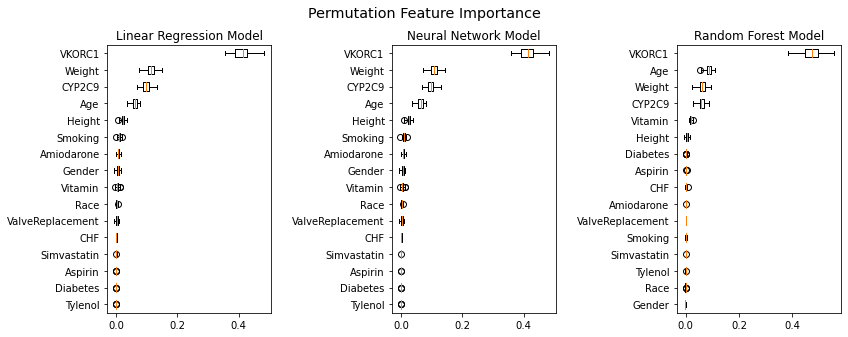

Wall time: 7.32 s


In [9]:
%%time
models = [('Linear Regression', model1), ('Neural Network', model2), ('Random Forest', model3)]
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

from sklearn.inspection import permutation_importance
for (name, model), ax in zip(models, axes):
  # 100회 permutation을 시행해 영향을 가장 많이 미치는 순서로 변수 정렬
  perm = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=RS, n_jobs=-1)
  sorted_idx = perm.importances_mean.argsort()
  ax.boxplot(perm.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
  ax.set_title(f"{name} Model")

plt.suptitle("Permutation Feature Importance", y=0.94, fontsize='x-large')
plt.tight_layout(pad=1.5)
plt.show()

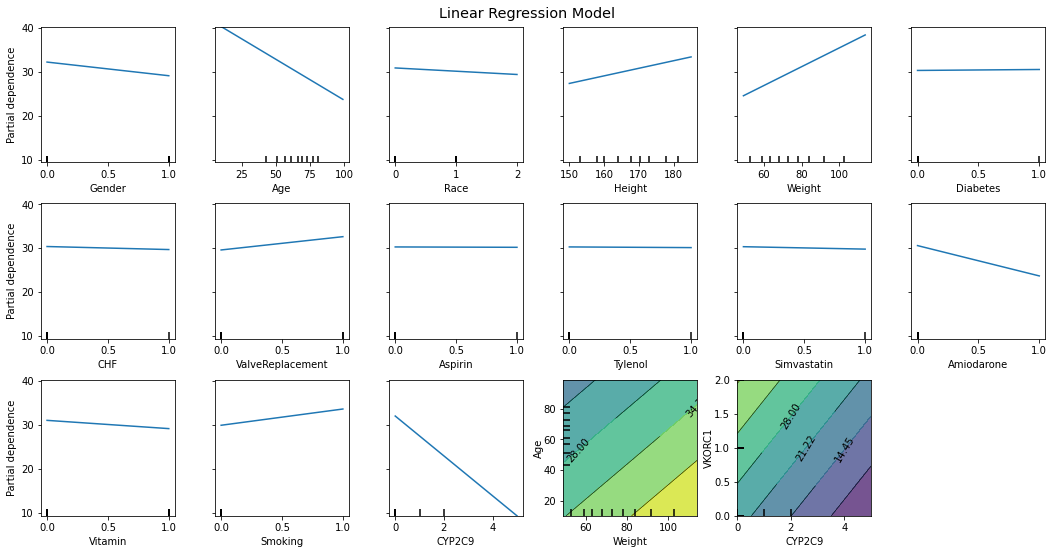

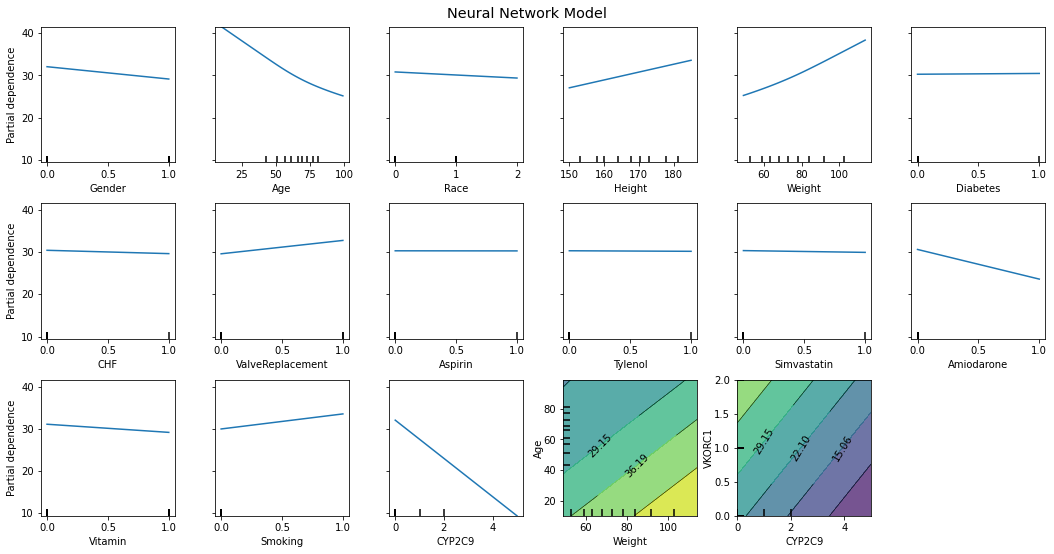

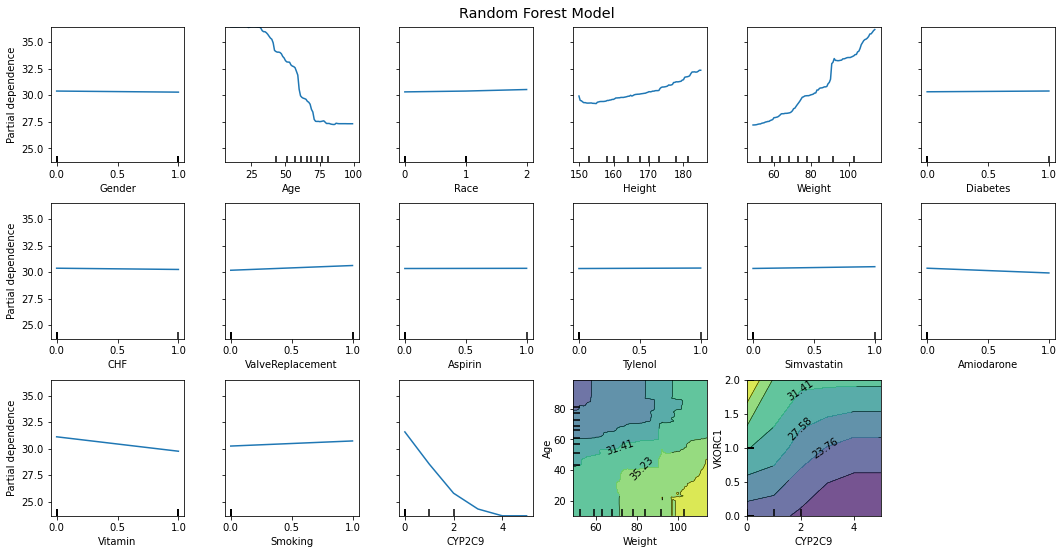

Wall time: 7min 40s


In [10]:
%%time
from sklearn.inspection import plot_partial_dependence
for name, model in models:
    features = list(X_train.columns[:-1]) + [("Weight", "Age"), ("CYP2C9", "VKORC1")]
    # Partial dependence plot 그리기
    p = plot_partial_dependence(model, X_train, features, n_cols=6, n_jobs=-1)
    p.figure_.set_size_inches(18, 9)
    p.axes_[2][3].yaxis.labelpad=0
    p.axes_[2][4].yaxis.labelpad=0
    plt.suptitle(name + ' Model', y=0.91, fontsize='x-large')
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()